**Name - Atharva Gondkar**

**Class - IS2**

**Roll Number - 2176032**

**Enrollment Number - MITU17BTMA0013**


---

**EXPERIMENT #2** 

**DATE: 01-09-2020**

---


#**TITLE : ML II ASSIGNMENT 2**

---


#**AIM**

Perform Digit Recognizer using MNIST dataset.


#**OBJECTIVE**
1. Implement DNN for Digit Recogniton using MNIST dataset.



**DRIVE LINK** - *https://drive.google.com/drive/u/0/folders/1VFRRP-IpjH_iq-Beojnorny4Rm53uT6E*

  **Notebook, code, pdf, output snapshots have been stored on the above given drive link.*

# **MNIST**

In [ ]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow import keras
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical as tcg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
(xtr,ytr),(xte,yte)=mnist.load_data()

In [ ]:
xtr.shape

(60000, 28, 28)

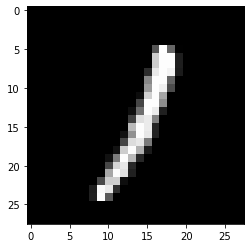

In [ ]:
plt.imshow(xtr[99], cmap='gray')

In [ ]:
ytr[99]

1

In [ ]:
xte=xte.reshape(xte.shape[0],xte.shape[1],xte.shape[2],1).astype('float32')/255
xtr=xtr.reshape(xtr.shape[0],xtr.shape[1],xtr.shape[2],1).astype('float32')/255

In [ ]:
xtr.shape
xte.shape

(10000, 28, 28, 1)

In [ ]:
ytr=tcg(ytr)
yte=tcg(yte)

In [ ]:
model = Sequential([
  Flatten(input_shape=(28, 28, 1)),
  Dense(784, activation='relu'),
  Dense(512, activation='relu'),
  Dense(392, activation='relu'),
  Dense(256, activation='relu'),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(32, activation='relu'),
  Dense(16, activation='relu'),
  Dense(10, activation='softmax'),
])

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
x_train,x_valid = xtr[5000:],xtr[:5000]
y_train,y_valid = ytr[5000:],ytr[:5000]

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath = 'best_model.h5',save_best_only = True,verbose=1)

history = model.fit(x_train,y_train,batch_size=256, epochs = 8,
          validation_data=(x_valid,y_valid),
          callbacks=[checkpoint],
          verbose=2, shuffle=True)


Epoch 1/8

Epoch 00001: val_loss improved from inf to 0.16810, saving model to best_model.h5
215/215 - 8s - loss: 0.4184 - accuracy: 0.8697 - val_loss: 0.1681 - val_accuracy: 0.9510
Epoch 2/8

Epoch 00002: val_loss improved from 0.16810 to 0.09107, saving model to best_model.h5
215/215 - 8s - loss: 0.1131 - accuracy: 0.9670 - val_loss: 0.0911 - val_accuracy: 0.9752
Epoch 3/8

Epoch 00003: val_loss did not improve from 0.09107
215/215 - 8s - loss: 0.0734 - accuracy: 0.9777 - val_loss: 0.1067 - val_accuracy: 0.9706
Epoch 4/8

Epoch 00004: val_loss improved from 0.09107 to 0.08936, saving model to best_model.h5
215/215 - 8s - loss: 0.0577 - accuracy: 0.9820 - val_loss: 0.0894 - val_accuracy: 0.9752
Epoch 5/8

Epoch 00005: val_loss improved from 0.08936 to 0.08676, saving model to best_model.h5
215/215 - 8s - loss: 0.0399 - accuracy: 0.9878 - val_loss: 0.0868 - val_accuracy: 0.9772
Epoch 6/8

Epoch 00006: val_loss improved from 0.08676 to 0.07425, saving model to best_model.h5
215/215 - 8s

In [ ]:
np.save('my_history.npy',history.history)

In [ ]:
history=np.load('my_history.npy',allow_pickle='TRUE').item()

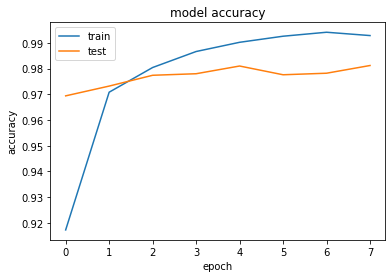

In [ ]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(xtr,ytr)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0162 - accuracy: 0.9952


[0.016175806522369385, 0.9951500296592712]

In [ ]:
score = model.evaluate(xte,yte)

313/313 [==============================] - 1s 4ms/step - loss: 0.0864 - accuracy: 0.9788


In [ ]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07490140944719315
Test accuracy: 0.9797999858856201
